## **SALES PREDICTION**

### **Import necassary Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

### **Load the dataset**

In [ ]:
df = pd.read_csv("/content/advertising.csv")

### **Explore the dataset**


In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


**Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Column names in the dataset**

In [ ]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

**Summary statistics of the datase**

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**Shape of the dataset**

In [ ]:
df.shape

(200, 4)


### Data Preprocessing

**Checking for missing values**


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Analysing Outliers**

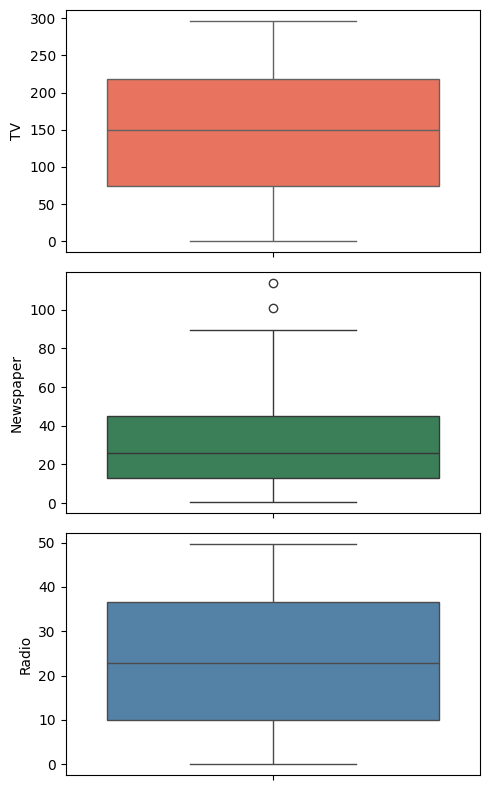

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,8))
plt1 = sns.boxplot(df['TV'], ax = axs[0],color='tomato')
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1], color="seagreen")
plt3 = sns.boxplot(df['Radio'], ax = axs[2], color="steelblue")
plt.tight_layout()

### Visualization

**Pairwise Relationships**

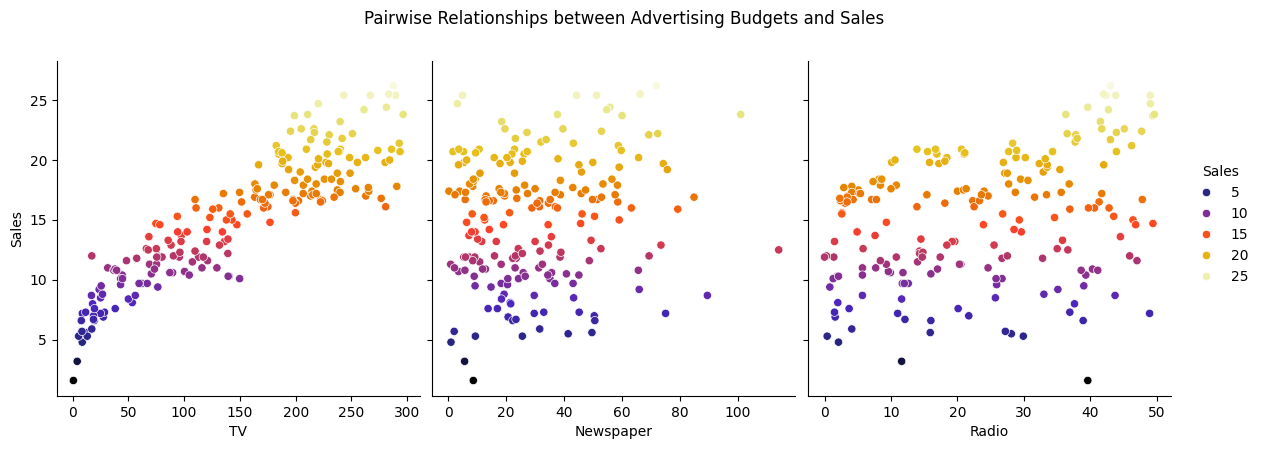

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter',hue='Sales', palette='CMRmap')
plt.suptitle('Pairwise Relationships between Advertising Budgets and Sales', y=1.1)
plt.show()

**Distribution of Advertising Budgets**

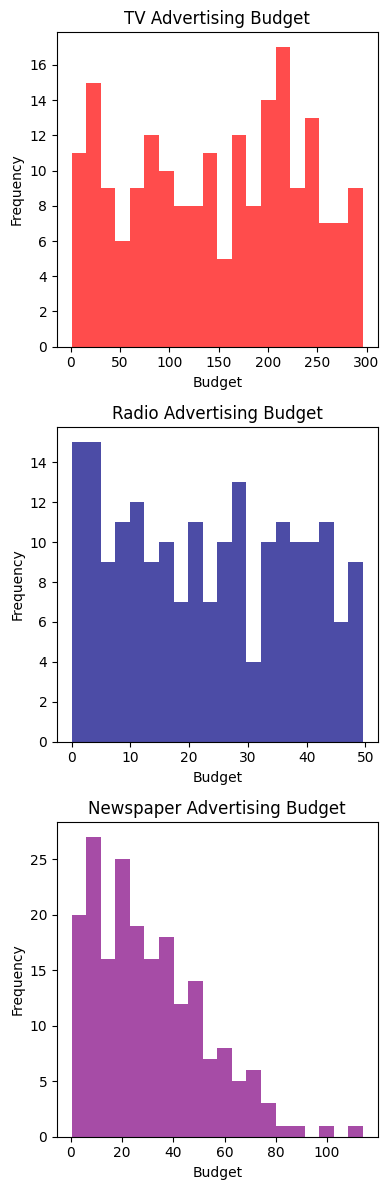

In [ ]:
plt.figure(figsize=(4, 12))
plt.subplot(3, 1, 1)
plt.hist(df['TV'], bins=20, color='red', alpha=0.7)
plt.title('TV Advertising Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(df['Radio'], bins=20, color='navy', alpha=0.7)
plt.title('Radio Advertising Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(df['Newspaper'], bins=20, color='purple', alpha=0.7)
plt.title('Newspaper Advertising Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Correlation between Advertising Budgets and Sales**

In [ ]:
correlation = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()

print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


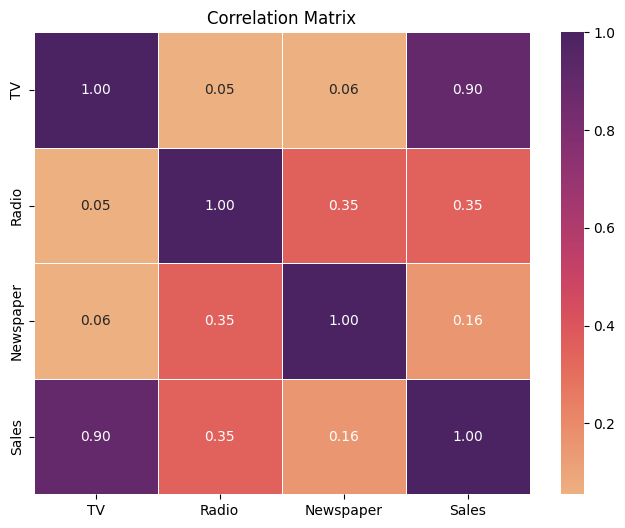

In [ ]:
plt.figure(figsize=(8, 6))
sns.color_palette("rocket", as_cmap=True)
sns.heatmap(correlation, annot=True, cmap='flare', fmt=".2f", linewidth=.7)

plt.title('Correlation Matrix')
plt.show()

### **Preparing data**

In [ ]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Linear Regression**

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2.9077569102710927


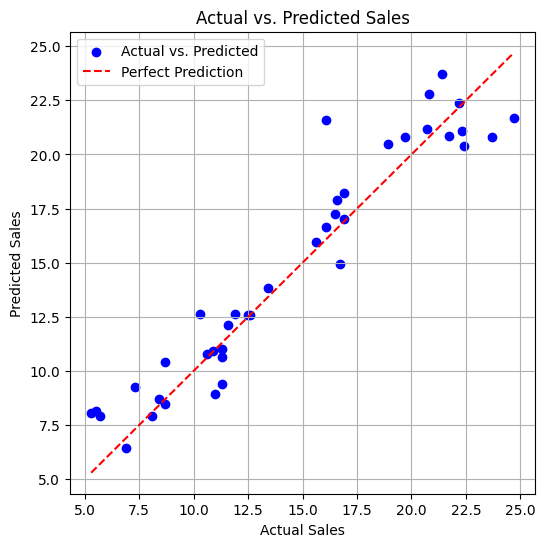

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()

### **Random Forest Regression**

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Regression: Mean Squared Error (MSE) =", mse_rf)

Random Forest Regression: Mean Squared Error (MSE) = 1.4368395500000006


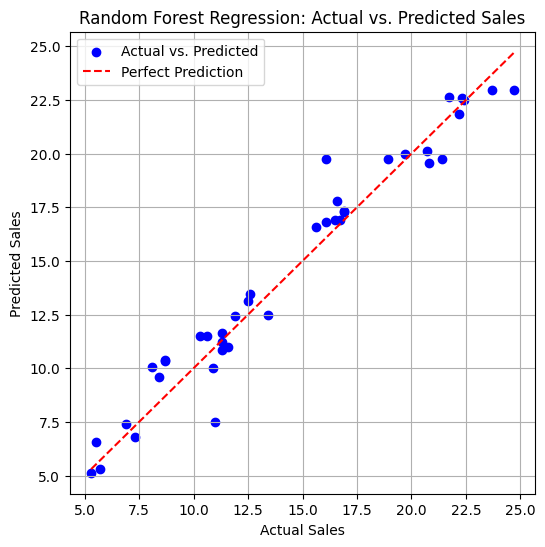

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Random Forest Regression: Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()